In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
py.sign_in("redreckless", "Wo0vdQkKIDIwk5ScJFBN")
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.preprocessing import RobustScaler

In [2]:
data = pd.read_csv('avocado.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Наведемо статистичні дані про наш датасет

In [4]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


# Візуалізація

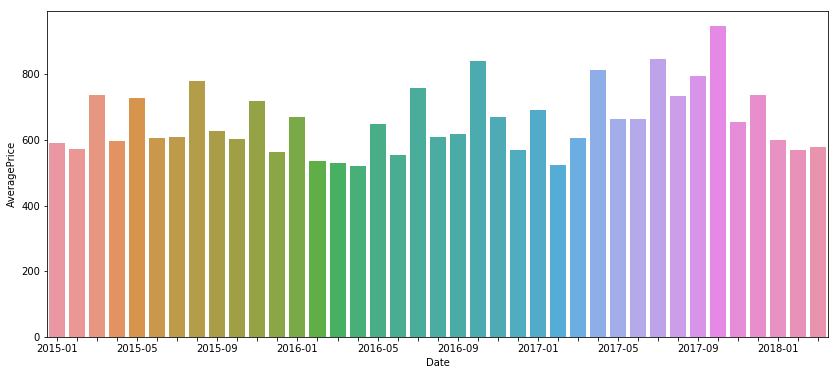

In [5]:
data.Date = pd.to_datetime(data.Date)
per = data.Date.dt.to_period("M")
g = data.groupby(per)
g = g.sum()
fig, ax = plt.subplots(1, 1, figsize=(14,6))
a = sns.barplot(g.index, g.AveragePrice)
a1 = a.set_xticklabels([g.index[i] if i%4==0 else ' ' for i in range(0, len(g.index)) ])

На даному барплоті представдена сумарна середня вартість по місяцям та рокам. Можна зробити висновки про певну сезонність у вартості авокадо

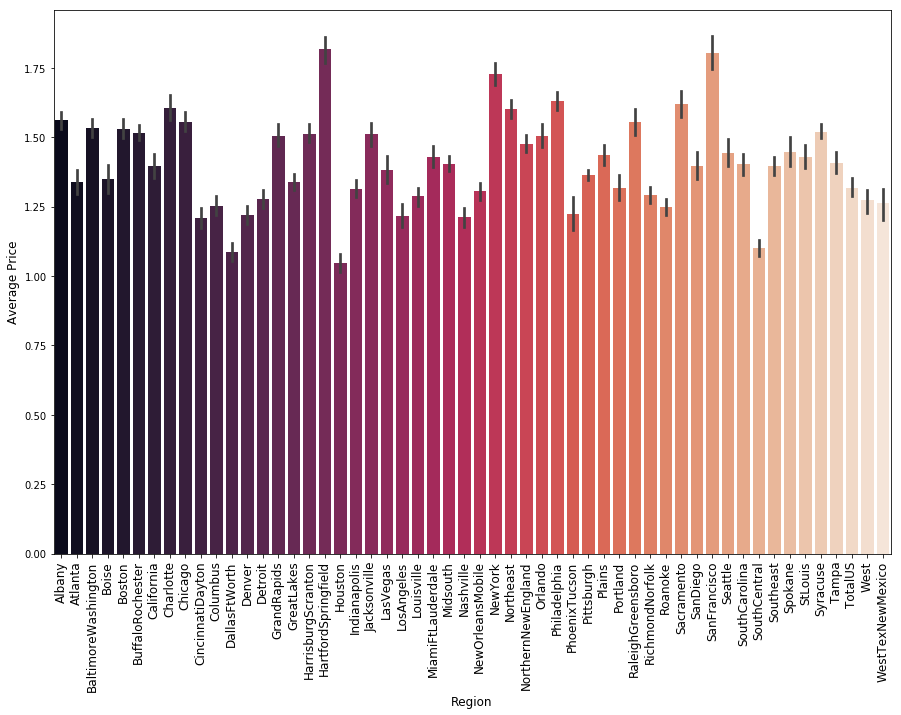

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))
ax=sns.barplot(x=data.region,y=data.AveragePrice,palette='rocket')

t=plt.xticks(rotation=90, size=12)
x=plt.xlabel('Region', size=12)
y=plt.ylabel('Average Price', size=12)

На даному барплоті представдена середня вартість в залежності від регіону. Помітно, що вартість авокадо відчутно залежить від регіону

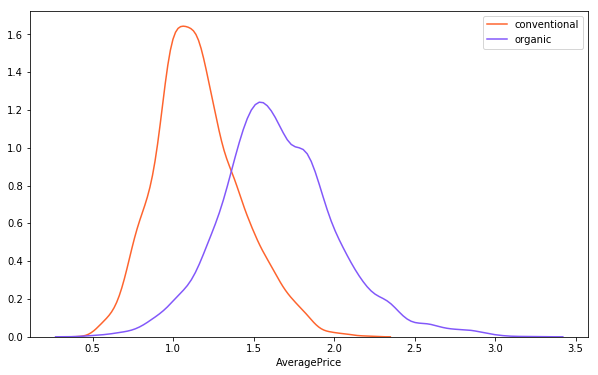

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
colors = ['#fe642e', '#8258fa']
i = 0
for type_ in list(data.type.unique()):
    sns.kdeplot(data[data.type==type_].AveragePrice, label = type_, shade = False, alpha = 1, color=colors[i])
    i+=1
    ax.set_xlabel('AveragePrice')

На даному графіку представлена зміна вартості авокадо в залежності від його типу. Математичне сподівання вартості органічного авокадо зміщене вправо відносно неорганічного. Очевидно, що органічний тип в середньому дорожчий

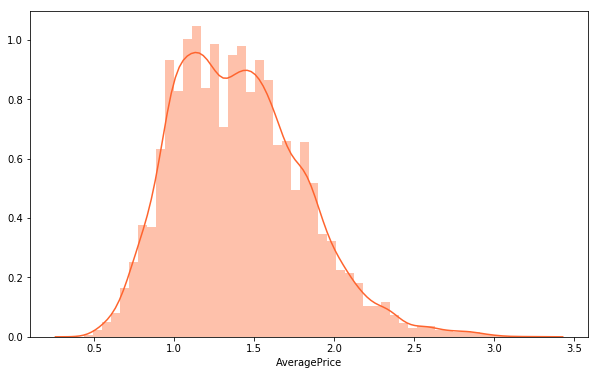

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
fig = sns.distplot(data["AveragePrice"], color = '#fe642e')

Вище показано гістограму вартості. Звідси ми можемо зробити висновки про її статистичний розподіл

In [10]:
x, y, z = data.AveragePrice, data.region, data.year
trace = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=1,
        opacity=0.6
        
    ),
)
data_ = [trace]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data_, layout=layout)
py.iplot(fig, filename='avocado')

Зробимо інтерактивну 3D візуалізацію взаємного розміщення в просторі стовпців AveragePrice, region i year.

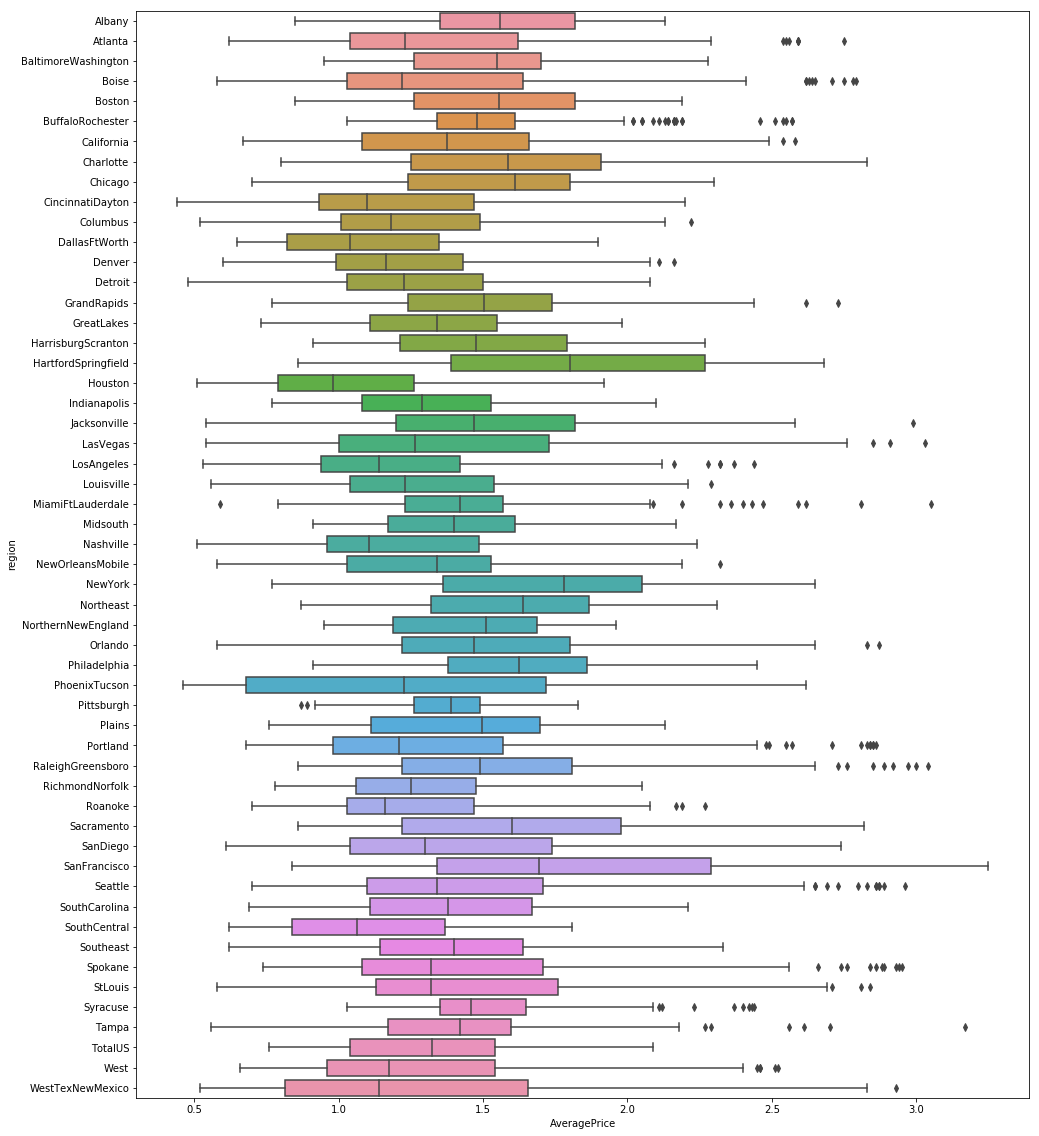

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(16, 20))
a = sns.boxplot(y='region', x="AveragePrice", data=data)

Вище наведені статистичні показники залежності між вартістю та окремими регіонами. У більшості випадків є викиди за верхню межу. Під час підготовки даних до навчання моделей, ми "почистимо" ці викиди. 

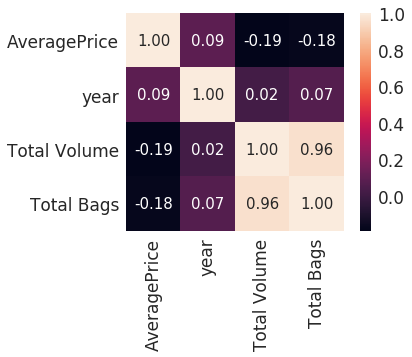

In [14]:
cols = ['AveragePrice','year','Total Volume','Total Bags']
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale = 1.7)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols, xticklabels = cols)

Вище наведено кореляційну матрицю признак нашого датасету. Можна зробити висновки, що таргет має слабку кореляцію з признаками, а Total Volume i Total Bags навпаки мають вильну кореляцію між собою, тому є сенс видалити один з признаків. 

# Моделі

In [11]:
data_ = data.join(pd.get_dummies(data[['type', 'region']]))
y = data_.AveragePrice
data_.drop(['type','region','Date', 'AveragePrice', 'Total Bags'], axis = 1, inplace=True)

In [12]:
models = [LinearRegression(),
          Lasso(alpha=0.00001),
          GradientBoostingRegressor(),
          RandomForestRegressor(n_estimators= 30, random_state=42)
]

Розділимо наші дані на вибірку для тренування та тестування.
Оберемо декілька моделей та будемо тестувати їх на кросс-валідації.
На кросс-валідацію подаємо тренувальну вибірку.

Для перевірки моделей та порівняння їх
роботи використаємо дві метрики Root-mean-square-deviation та R2-score. Дані метрики підходять нам для задачі регресії та дають інтуїтивно зрозумілі результати

In [13]:
x_train, x_test, y_train, y_test = train_test_split(data_, y, random_state=42)

In [27]:
folds = KFold(n_splits=5, shuffle=True, random_state=42)
acc_rmse = []
acc_r2 = []
for model in models:
    for train, test in folds.split(x_train):
        acc1 = []
        acc2 = []
        result = model.fit(x_train.iloc[train], y_train.iloc[train]).predict(x_train.iloc[test])
        acc1.append((mse(y_pred=result, y_true=y_train.iloc[test]))**(1/2))
        acc2.append(r2(y_pred=result, y_true=y_train.iloc[test]))
    acc_rmse.append(np.round(sum(acc1)/len(acc1), 4))
    acc_r2.append(np.round(sum(acc2)/len(acc2), 4))
    print(f'Model: {model.__class__.__name__}: \n\t RMSE: {sum(acc1)/len(acc1):.4f} R2: {sum(acc2)/len(acc2):.4f}')

Model: LinearRegression: 
	 RMSE: 0.2700 R2: 0.5425
Model: Lasso: 
	 RMSE: 0.2701 R2: 0.5423
Model: GradientBoostingRegressor: 
	 RMSE: 0.2328 R2: 0.6599
Model: RandomForestRegressor: 
	 RMSE: 0.1677 R2: 0.8236


Спробуємо стандартизувати та нормалізувати дані за допомогою стандартного методу з Sklearn RobustScaller.

In [28]:
folds = KFold(n_splits=5, shuffle=True, random_state=42)
acc_rmse = []
acc_r2 = []
scale = RobustScaler(with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0))
for model in models:
    for train, test in folds.split(x_train):
        acc1 = []
        acc2 = []
        mod = model.fit(scale.fit_transform(x_train.iloc[train]), y_train.iloc[train])
        result = mod.predict(scale.transform(x_train.iloc[test]))
        acc1.append((mse(y_pred=result, y_true=y_train.iloc[test]))**(1/2))
        acc2.append(r2(y_pred=result, y_true=y_train.iloc[test]))
    acc_rmse.append(np.round(sum(acc1)/len(acc1), 4))
    acc_r2.append(np.round(sum(acc2)/len(acc2), 4))
    print(f'Model: {model.__class__.__name__}: \n\t RMSE: {sum(acc1)/len(acc1):.4f} R2: {sum(acc2)/len(acc2):.4f}')

Model: LinearRegression: 
	 RMSE: 0.2702 R2: 0.5418
Model: Lasso: 
	 RMSE: 0.2701 R2: 0.5423
Model: GradientBoostingRegressor: 
	 RMSE: 0.2331 R2: 0.6590
Model: RandomForestRegressor: 
	 RMSE: 0.1675 R2: 0.8240


Як бачимо на певних моделях результат після таких дій трішки покращився, тож використаємо це при роботі з тестовими даними.

На двох обраних метриках найкраще проявила себе модель RandomForest. Саме її і застосуємо на тестові дані. 

In [29]:
scale = RobustScaler(with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0))
final_model = RandomForestRegressor(n_estimators= 30, random_state=42).fit(scale.fit_transform(x_train), y_train)
answer = final_model.predict(scale.transform(x_test))
rmse = mse(y_pred=answer, y_true=y_test)**(1/2)
R2 = r2(y_pred=answer, y_true=y_test)
print(f'RMSE: {rmse:.4f} R: {R2:.4f}')

RMSE: 0.1544 R: 0.8522
